## Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import requests
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from random import random
from datetime import datetime
from sklearn.model_selection import train_test_split

## Download TSE files

In [2]:
# set current directory and change to folder "raw_data"
current_dir_orig = os.getcwd()
os.chdir(f"{current_dir_orig}/raw_data")

In [3]:
def download_files(zipp):
    
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
    
    for file_name, url in zipp:
        
        download = requests.get(url, headers=headers, stream=True)
        open(f"{file_name}", 'wb').write(download.content)
    

url_prest_contas = 'https://cdn.tse.jus.br/estatistica/sead/odsele/prestacao_contas/prestacao_de_contas_eleitorais_candidatos_2022.zip'
url_candidatos = 'https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2022.zip'
url_vagas = 'https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_vagas/consulta_vagas_2022.zip'

zipfiles_names = ['prestacao_de_contas_eleitorais_candidatos_2022.zip', 'consulta_cand_2022.zip', 'consulta_vagas_2022.zip']
urls = [url_prest_contas, url_candidatos, url_vagas]

current_dir = os.getcwd()

# criteria to download only once
if len(os.listdir(current_dir)) == 0:
    download_files(zip(zipfiles_names, urls))
else:
    pass


## Import Data

In [4]:
files = os.listdir(current_dir)

zip_list = [zipfile.ZipFile(file) for file in files]

candidatos_relevant_files = ['consulta_cand_2022_BRASIL.csv']
vagas_relevant_files = ['consulta_vagas_2022_BRASIL.csv']
prestcontas_relevant_files = ['receitas_candidatos_2022_BRASIL.csv', 'despesas_contratadas_candidatos_2022_BRASIL.csv']


In [5]:
# columns of interest

cols_candidatos = ['ANO_ELEICAO',
                   'DS_ELEICAO',
                   'SG_UE',
                   'DS_CARGO',
                   'SQ_CANDIDATO',
                   'NR_CANDIDATO',
                   'NM_CANDIDATO',
                   'NR_PARTIDO',
                   'SG_PARTIDO',
                   'NM_PARTIDO',
                   'DS_NACIONALIDADE',
                   'NR_IDADE_DATA_POSSE',
                   'DS_GENERO',
                   'DS_GRAU_INSTRUCAO',
                   'DS_ESTADO_CIVIL',
                   'DS_COR_RACA',
                   'DS_OCUPACAO',
                   'ST_CANDIDATO_INSERIDO_URNA',
                   'ST_REELEICAO'
                   ]

cols_vagas = ['ANO_ELEICAO',
              'DS_ELEICAO',
              'SG_UE',
              'DS_CARGO',
              'QT_VAGAS'
             ]


cols_income = ['ANO_ELEICAO',
               'DS_ELEICAO',
               'TP_PRESTACAO_CONTAS',
               'SQ_PRESTADOR_CONTAS',
               'SG_UE',
               'NR_CNPJ_PRESTADOR_CONTA',
               'DS_CARGO',
               'SQ_CANDIDATO',
               'NR_CANDIDATO',
               'NM_CANDIDATO',
               'NR_PARTIDO',
               'SG_PARTIDO',
               'NM_PARTIDO',
               'DS_FONTE_RECEITA',
               'DS_ORIGEM_RECEITA',
               'DS_ESPECIE_RECEITA',
               'NR_CPF_CNPJ_DOADOR',
               'NM_DOADOR_RFB',
               'DT_RECEITA',
               'VR_RECEITA'
               ]

cols_expense = ['ANO_ELEICAO',
                'DS_ELEICAO',
                'TP_PRESTACAO_CONTAS',
                'SQ_PRESTADOR_CONTAS',
                'SG_UE',
                'NR_CNPJ_PRESTADOR_CONTA',
                'DS_CARGO',
                'SQ_CANDIDATO',
                'NR_CANDIDATO',
                'NM_CANDIDATO',
                'NR_PARTIDO',
                'SG_PARTIDO',
                'NM_PARTIDO',
                'DS_TIPO_FORNECEDOR',
                'NR_CPF_CNPJ_FORNECEDOR',
                'NM_FORNECEDOR_RFB',
                'DS_ORIGEM_DESPESA',
                'DT_DESPESA',
                'VR_DESPESA_CONTRATADA'
               ]

cols_electeds = ['ds_cargo',
                 'nr_candidato',
                 'nm_candidato',
                 'sg_partido',
                 'sg_ue',
                 'sq_candidato',
                 'qt_votos_nom_validos'
                ]


candidatos_df = pd.read_csv(zip_list[0].open(candidatos_relevant_files[0]),
                            sep = ';',
                            usecols = cols_candidatos,
                            encoding = 'windows-1252'
                            )

vagas_df = pd.read_csv(zip_list[1].open(vagas_relevant_files[0]),
                       sep = ';',
                       usecols = cols_vagas,
                       encoding = 'windows-1252'
                       )

income_df = pd.read_csv(zip_list[2].open(prestcontas_relevant_files[0]),
                        sep = ';',
                        usecols = cols_income,
                        encoding = 'windows-1252'
                        )

expense_df = pd.read_csv(zip_list[2].open(prestcontas_relevant_files[1]),
                         sep = ';',
                         usecols = cols_expense,
                         encoding = 'windows-1252'
                         )

# change to original directory
os.chdir(current_dir_orig)

electeds_df = pd.read_csv(r'./support_files/eleitas_eleitos-região_presidente_2022.csv',
                          sep = ';',
                          usecols = cols_electeds,
                          encoding = 'windows-1252'
                          )


## Exploratory Data Analysis

In [6]:
# see all columns
pd.set_option('display.max_columns', None)

In [7]:
candidatos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29314 entries, 0 to 29313
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ANO_ELEICAO                 29314 non-null  int64  
 1   DS_ELEICAO                  29314 non-null  object 
 2   SG_UE                       29314 non-null  object 
 3   DS_CARGO                    29314 non-null  object 
 4   SQ_CANDIDATO                29314 non-null  int64  
 5   NR_CANDIDATO                29314 non-null  int64  
 6   NM_CANDIDATO                29314 non-null  object 
 7   NR_PARTIDO                  29314 non-null  int64  
 8   SG_PARTIDO                  29314 non-null  object 
 9   NM_PARTIDO                  29314 non-null  object 
 10  DS_NACIONALIDADE            29314 non-null  object 
 11  NR_IDADE_DATA_POSSE         29289 non-null  float64
 12  DS_GENERO                   29314 non-null  object 
 13  DS_GRAU_INSTRUCAO           293

In [8]:
candidatos_df.head()

,ANO_ELEICAO,DS_ELEICAO,SG_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DS_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,ST_REELEICAO,ST_CANDIDATO_INSERIDO_URNA
0,2022,Eleições Gerais Estaduais 2022,DF,DEPUTADO FEDERAL,70001650385,1123,CELY LANGAMER MUNIZ,11,PP,PROGRESSISTAS,BRASILEIRA NATA,51.0,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PROFESSOR DE ENSINO DE PRIMEIRO E SEGUNDO GRAUS,N,SIM
1,2022,Eleições Gerais Estaduais 2022,PE,DEPUTADO FEDERAL,170001618619,1167,MARCOS BEZERRA CAMPELO,11,PP,PROGRESSISTAS,BRASILEIRA NATA,55.0,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,OUTROS,N,SIM
2,2022,Eleições Gerais Estaduais 2022,RO,DEPUTADO ESTADUAL,220001647615,35355,DIHESSICA DAYANE FERREIRA DA SILVA,35,PMB,PARTIDO DA MULHER BRASILEIRA,BRASILEIRA NATA,25.0,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,N,SIM
3,2022,Eleições Gerais Estaduais 2022,RO,DEPUTADO FEDERAL,220001605554,4456,MARY TERESINHA BRAGANHOL,44,UNIÃO,UNIÃO BRASIL,BRASILEIRA NATA,58.0,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SERVIDOR PÚBLICO ESTADUAL,N,SIM
4,2022,Eleições Gerais Estaduais 2022,RJ,DEPUTADO ESTADUAL,190001613885,33337,ROBERTA PATRÍCIA DA SILVA ALMEIDA,33,PMN,PARTIDO DA MOBILIZAÇÃO NACIONAL,BRASILEIRA NATA,47.0,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),BRANCA,DONA DE CASA,N,SIM


In [9]:
vagas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ANO_ELEICAO  109 non-null    int64 
 1   DS_ELEICAO   109 non-null    object
 2   SG_UE        109 non-null    object
 3   DS_CARGO     109 non-null    object
 4   QT_VAGAS     109 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.4+ KB


In [10]:
vagas_df.head()

,ANO_ELEICAO,DS_ELEICAO,SG_UE,DS_CARGO,QT_VAGAS
0,2022,Eleição Geral Federal 2022,BR,Presidente,1
1,2022,Eleições Gerais Estaduais 2022,AL,Governador,1
2,2022,Eleições Gerais Estaduais 2022,AL,Senador,1
3,2022,Eleições Gerais Estaduais 2022,AL,Deputado Federal,9
4,2022,Eleições Gerais Estaduais 2022,AL,Deputado Estadual,27


In [11]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627191 entries, 0 to 627190
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ANO_ELEICAO              627191 non-null  int64 
 1   DS_ELEICAO               627191 non-null  object
 2   TP_PRESTACAO_CONTAS      627191 non-null  object
 3   SQ_PRESTADOR_CONTAS      627191 non-null  int64 
 4   SG_UE                    627191 non-null  object
 5   NR_CNPJ_PRESTADOR_CONTA  627191 non-null  int64 
 6   DS_CARGO                 627191 non-null  object
 7   SQ_CANDIDATO             627191 non-null  int64 
 8   NR_CANDIDATO             627191 non-null  int64 
 9   NM_CANDIDATO             627191 non-null  object
 10  NR_PARTIDO               627191 non-null  int64 
 11  SG_PARTIDO               627191 non-null  object
 12  NM_PARTIDO               627191 non-null  object
 13  DS_FONTE_RECEITA         627191 non-null  object
 14  DS_ORIGEM_RECEITA   

In [12]:
print(income_df.shape)
income_df.head()

(627191, 20)


,ANO_ELEICAO,DS_ELEICAO,TP_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,SG_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_ESPECIE_RECEITA,NR_CPF_CNPJ_DOADOR,NM_DOADOR_RFB,DT_RECEITA,VR_RECEITA
0,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3772983033,MG,47450250000197,Deputado Federal,130001607637,4443,PAULO CESAR SANTOS NEVES,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,Transferência eletrônica,50664093604,PAULO CESAR SANTOS NEVES,24/08/2022,"500,00"
1,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3782116438,MT,47486486000183,Deputado Federal,110001612775,4477,AÉCIO GUERINO DE SOUZA RODRIGUES,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,Transferência eletrônica,39359103802,AECIO GUERINO DE SOUZA RODRIGUES,15/08/2022,"30000,00"
2,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3785018645,SC,47496884000180,Deputado Estadual,240001616178,44544,MARCILEI MARIA GABRIELA ZAMBONI,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,Depósito em espécie,2441483927,MARCILEI MARIA GABRIELA ZAMBONI,24/08/2022,"50,00"
3,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3796037695,SP,47552212000145,Deputado Federal,250001651724,4427,REINALDO MONTEIRO DA SILVA,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,PIX,16653258874,REINALDO MONTEIRO DA SILVA,29/08/2022,"461,75"
4,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3796037695,SP,47552212000145,Deputado Federal,250001651724,4427,REINALDO MONTEIRO DA SILVA,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,PIX,16653258874,REINALDO MONTEIRO DA SILVA,22/08/2022,"187,30"


In [13]:
expense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604637 entries, 0 to 1604636
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   ANO_ELEICAO              1604637 non-null  int64 
 1   DS_ELEICAO               1604637 non-null  object
 2   TP_PRESTACAO_CONTAS      1604637 non-null  object
 3   SQ_PRESTADOR_CONTAS      1604637 non-null  int64 
 4   SG_UE                    1604637 non-null  object
 5   NR_CNPJ_PRESTADOR_CONTA  1604637 non-null  int64 
 6   DS_CARGO                 1604637 non-null  object
 7   SQ_CANDIDATO             1604637 non-null  int64 
 8   NR_CANDIDATO             1604637 non-null  int64 
 9   NM_CANDIDATO             1604637 non-null  object
 10  NR_PARTIDO               1604637 non-null  int64 
 11  SG_PARTIDO               1604637 non-null  object
 12  NM_PARTIDO               1604637 non-null  object
 13  DS_TIPO_FORNECEDOR       1604637 non-null  object
 14  NR

In [14]:
print(expense_df.shape)
expense_df.head()

(1604637, 19)


,ANO_ELEICAO,DS_ELEICAO,TP_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,SG_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DS_TIPO_FORNECEDOR,NR_CPF_CNPJ_FORNECEDOR,NM_FORNECEDOR_RFB,DS_ORIGEM_DESPESA,DT_DESPESA,VR_DESPESA_CONTRATADA
0,2022,Eleições Gerais Estaduais 2022,Final,3786741747,AC,47507780000124,Deputado Federal,10001619992,1022,KEILIANE NUNES DE MELO CORDEIRO,10,REPUBLICANOS,REPUBLICANOS,Pessoa Física,2813343234,JOAQUIM CARVALHO CARDOSO,Locação/cessão de bens imóveis,16/08/2022,"8500,00"
1,2022,Eleições Gerais Estaduais 2022,Final,3794801715,AC,47547897000131,Senador,10001643446,400,JANILSON LOPES LEITE,40,PSB,Partido Socialista Brasileiro,Pessoa Física,997215208,ERINEIDE MAIA JERONIMO,Atividades de militância e mobilização de rua,09/09/2022,"606,00"
2,2022,Eleições Gerais Estaduais 2022,Relatório Financeiro,3785018974,AC,47497212000190,Governador,10001616169,13,JORGE NEY VIANA MACEDO NEVES,13,PT,Partido dos Trabalhadores,Pessoa Física,2616576155,JOSIEL PEREIRA DA SILVA SOUZA,Atividades de militância e mobilização de rua,19/09/2022,"1000,00"
3,2022,Eleições Gerais Estaduais 2022,Final,3794801715,AC,47547897000131,Senador,10001643446,400,JANILSON LOPES LEITE,40,PSB,Partido Socialista Brasileiro,Pessoa Física,1441154256,JOSE ANTONIO AUGUSTO FEITOSA KAXINAWA,Atividades de militância e mobilização de rua,09/09/2022,"606,00"
4,2022,Eleições Gerais Estaduais 2022,Final,3794801715,AC,47547897000131,Senador,10001643446,400,JANILSON LOPES LEITE,40,PSB,Partido Socialista Brasileiro,Pessoa Física,70217769268,VANESSA AZEVEDO OLIVEIRA,Atividades de militância e mobilização de rua,09/09/2022,"606,00"


In [15]:
electeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ds_cargo              513 non-null    object
 1   nr_candidato          513 non-null    int64 
 2   nm_candidato          513 non-null    object
 3   sg_partido            513 non-null    object
 4   sg_ue                 513 non-null    object
 5   sq_candidato          513 non-null    int64 
 6   qt_votos_nom_validos  513 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 28.2+ KB


In [16]:
print(electeds_df.shape)
electeds_df.head()

(513, 7)


,ds_cargo,nr_candidato,nm_candidato,sg_partido,sg_ue,sq_candidato,qt_votos_nom_validos
0,Deputado Federal,1101,MARIA DO SOCORRO NERI MEDEIROS DE SOUZA,PP,AC,10001621643,25842
1,Deputado Federal,4455,ROZIMEIRE RIBEIRO ANDRADE,UNIÃO,AC,10001612486,21285
2,Deputado Federal,4422,ULYSSES FREITAS PEREIRA DE ARAUJO,UNIÃO,AC,10001612487,21075
3,Deputado Federal,1122,JOSÉ ESTEPHAN BARBARY FILHO,PP,AC,10001621646,19958
4,Deputado Federal,1111,GEHLEN DINIZ ANDRADE,PP,AC,10001621650,19560


## Data Wrangling

In [17]:
# drop candidates with null values in the column
candidatos_df.dropna(axis=0, how="any", subset=['NR_IDADE_DATA_POSSE'], inplace=True)
candidatos_df['NR_IDADE_DATA_POSSE'] = candidatos_df['NR_IDADE_DATA_POSSE'].astype(np.int32)

In [18]:
candidatos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29289 entries, 0 to 29313
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ANO_ELEICAO                 29289 non-null  int64 
 1   DS_ELEICAO                  29289 non-null  object
 2   SG_UE                       29289 non-null  object
 3   DS_CARGO                    29289 non-null  object
 4   SQ_CANDIDATO                29289 non-null  int64 
 5   NR_CANDIDATO                29289 non-null  int64 
 6   NM_CANDIDATO                29289 non-null  object
 7   NR_PARTIDO                  29289 non-null  int64 
 8   SG_PARTIDO                  29289 non-null  object
 9   NM_PARTIDO                  29289 non-null  object
 10  DS_NACIONALIDADE            29289 non-null  object
 11  NR_IDADE_DATA_POSSE         29289 non-null  int32 
 12  DS_GENERO                   29289 non-null  object
 13  DS_GRAU_INSTRUCAO           29289 non-null  ob

In [19]:
candidatos_df.head()

,ANO_ELEICAO,DS_ELEICAO,SG_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DS_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,ST_REELEICAO,ST_CANDIDATO_INSERIDO_URNA
0,2022,Eleições Gerais Estaduais 2022,DF,DEPUTADO FEDERAL,70001650385,1123,CELY LANGAMER MUNIZ,11,PP,PROGRESSISTAS,BRASILEIRA NATA,51,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PROFESSOR DE ENSINO DE PRIMEIRO E SEGUNDO GRAUS,N,SIM
1,2022,Eleições Gerais Estaduais 2022,PE,DEPUTADO FEDERAL,170001618619,1167,MARCOS BEZERRA CAMPELO,11,PP,PROGRESSISTAS,BRASILEIRA NATA,55,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,OUTROS,N,SIM
2,2022,Eleições Gerais Estaduais 2022,RO,DEPUTADO ESTADUAL,220001647615,35355,DIHESSICA DAYANE FERREIRA DA SILVA,35,PMB,PARTIDO DA MULHER BRASILEIRA,BRASILEIRA NATA,25,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,N,SIM
3,2022,Eleições Gerais Estaduais 2022,RO,DEPUTADO FEDERAL,220001605554,4456,MARY TERESINHA BRAGANHOL,44,UNIÃO,UNIÃO BRASIL,BRASILEIRA NATA,58,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SERVIDOR PÚBLICO ESTADUAL,N,SIM
4,2022,Eleições Gerais Estaduais 2022,RJ,DEPUTADO ESTADUAL,190001613885,33337,ROBERTA PATRÍCIA DA SILVA ALMEIDA,33,PMN,PARTIDO DA MOBILIZAÇÃO NACIONAL,BRASILEIRA NATA,47,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),BRANCA,DONA DE CASA,N,SIM


In [20]:
# convert column VR_RECEITA from object to float
income_df['VR_RECEITA'] = income_df['VR_RECEITA'].str.replace(',', '.').astype(float)
expense_df['VR_DESPESA_CONTRATADA'] = expense_df['VR_DESPESA_CONTRATADA'].str.replace(',', '.').astype(float)

# convert string to date format
income_df['DT_RECEITA'] = pd.to_datetime(income_df['DT_RECEITA'], dayfirst = True, format = "%d/%m/%Y")
expense_df['DT_DESPESA'] = pd.to_datetime(expense_df['DT_DESPESA'], dayfirst = True, format = "%d/%m/%Y")


In [21]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627191 entries, 0 to 627190
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ANO_ELEICAO              627191 non-null  int64         
 1   DS_ELEICAO               627191 non-null  object        
 2   TP_PRESTACAO_CONTAS      627191 non-null  object        
 3   SQ_PRESTADOR_CONTAS      627191 non-null  int64         
 4   SG_UE                    627191 non-null  object        
 5   NR_CNPJ_PRESTADOR_CONTA  627191 non-null  int64         
 6   DS_CARGO                 627191 non-null  object        
 7   SQ_CANDIDATO             627191 non-null  int64         
 8   NR_CANDIDATO             627191 non-null  int64         
 9   NM_CANDIDATO             627191 non-null  object        
 10  NR_PARTIDO               627191 non-null  int64         
 11  SG_PARTIDO               627191 non-null  object        
 12  NM_PARTIDO      

In [22]:
expense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604637 entries, 0 to 1604636
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   ANO_ELEICAO              1604637 non-null  int64         
 1   DS_ELEICAO               1604637 non-null  object        
 2   TP_PRESTACAO_CONTAS      1604637 non-null  object        
 3   SQ_PRESTADOR_CONTAS      1604637 non-null  int64         
 4   SG_UE                    1604637 non-null  object        
 5   NR_CNPJ_PRESTADOR_CONTA  1604637 non-null  int64         
 6   DS_CARGO                 1604637 non-null  object        
 7   SQ_CANDIDATO             1604637 non-null  int64         
 8   NR_CANDIDATO             1604637 non-null  int64         
 9   NM_CANDIDATO             1604637 non-null  object        
 10  NR_PARTIDO               1604637 non-null  int64         
 11  SG_PARTIDO               1604637 non-null  object        
 12  

In [23]:
header_electeds = [name.upper() for name in electeds_df.columns]

electeds_df.rename(dict(zip(list(electeds_df.columns),header_electeds)), axis=1, inplace=True)


In [24]:
electeds_df.head()

,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,SG_UE,SQ_CANDIDATO,QT_VOTOS_NOM_VALIDOS
0,Deputado Federal,1101,MARIA DO SOCORRO NERI MEDEIROS DE SOUZA,PP,AC,10001621643,25842
1,Deputado Federal,4455,ROZIMEIRE RIBEIRO ANDRADE,UNIÃO,AC,10001612486,21285
2,Deputado Federal,4422,ULYSSES FREITAS PEREIRA DE ARAUJO,UNIÃO,AC,10001612487,21075
3,Deputado Federal,1122,JOSÉ ESTEPHAN BARBARY FILHO,PP,AC,10001621646,19958
4,Deputado Federal,1111,GEHLEN DINIZ ANDRADE,PP,AC,10001621650,19560


## Relevant Analysis

### Electoral Resources

In [25]:
# types of financing
income_types = income_df['DS_FONTE_RECEITA'].unique().tolist()
income_types

['OUTROS RECURSOS', 'FUNDO ESPECIAL', 'FUNDO PARTIDARIO']

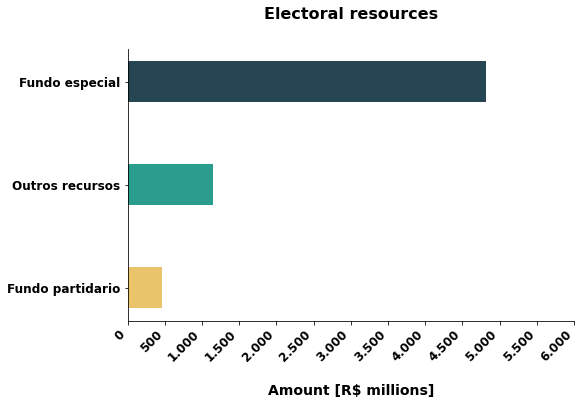

In [26]:
# group by types of financing
financing_df = income_df.groupby('DS_FONTE_RECEITA')['VR_RECEITA'].sum().sort_values()

index = [idx.lower().capitalize() for idx in list(financing_df.index)]
values = financing_df.values/1e6

xticks = list(range(0,6500,500))
x = [format(number,',d') for number in xticks]
xf = [num.replace(',','.') for num in x]

fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1, 1, 1)

ax.barh(index, values, height = 0.4, color = ['#e9c46a', '#2a9d8f', '#264653'])

plt.title("Electoral resources", fontsize = 16.0, fontweight = 'bold', pad=30)
plt.yticks(fontsize = 12.0, fontweight = 'bold')

plt.xlabel("Amount [R$ millions]", fontsize = 14.0, fontweight = 'bold')
plt.xticks(ticks = xticks, labels = xf, fontsize = 12.0, rotation=45, ha="right", fontweight = 'bold')

# adjust space between label and axis
ax.xaxis.labelpad = 20

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.lef.set_visible(False)
ax.tick_params(left=False)


plt.show()

### Resources by party

In [27]:
# group by income per party
parties = income_df['SG_PARTIDO'].unique().tolist()

filt_part_resouces = {inc: income_df.loc[income_df['DS_FONTE_RECEITA'] == inc] for inc in income_types}

part_resources_dic = {inc: df.groupby('SG_PARTIDO')['VR_RECEITA'].sum().sort_values(ascending=True) for inc, df in filt_part_resouces.items()}

In [28]:
parties_df = pd.DataFrame(index=parties, columns=income_types)

for col in parties_df.columns:
    for idx in parties_df.index:
        
        if idx not in part_resources_dic[col].index:
            
            parties_df.at[idx,col] = 0
            
        else:
            
            parties_df.at[idx,col] = part_resources_dic[col][idx]/1e6

parties_df['TOTAL'] = parties_df.sum(axis=1).values
parties_df.sort_values(by=['TOTAL'], inplace=True)
parties_df

,OUTROS RECURSOS,FUNDO ESPECIAL,FUNDO PARTIDARIO,TOTAL
PCB,0.254789,0,0,0.254789
PCO,0,0.680988,0.005,0.685988
UP,0.091985,2.217158,0.000685,2.309828
PSTU,0.364658,3.015415,0.005,3.385073
PMB,3.773038,2.175636,0.007221,5.955894
PRTB,8.633132,1.967762,0.063807,10.664701
DC,3.146552,8.960944,0.087151,12.194647
AGIR,4.445094,18.425013,0.238,23.108107
PMN,6.064572,23.19423,0.110265,29.369066
PV,12.951003,45.560547,0.475395,58.986945


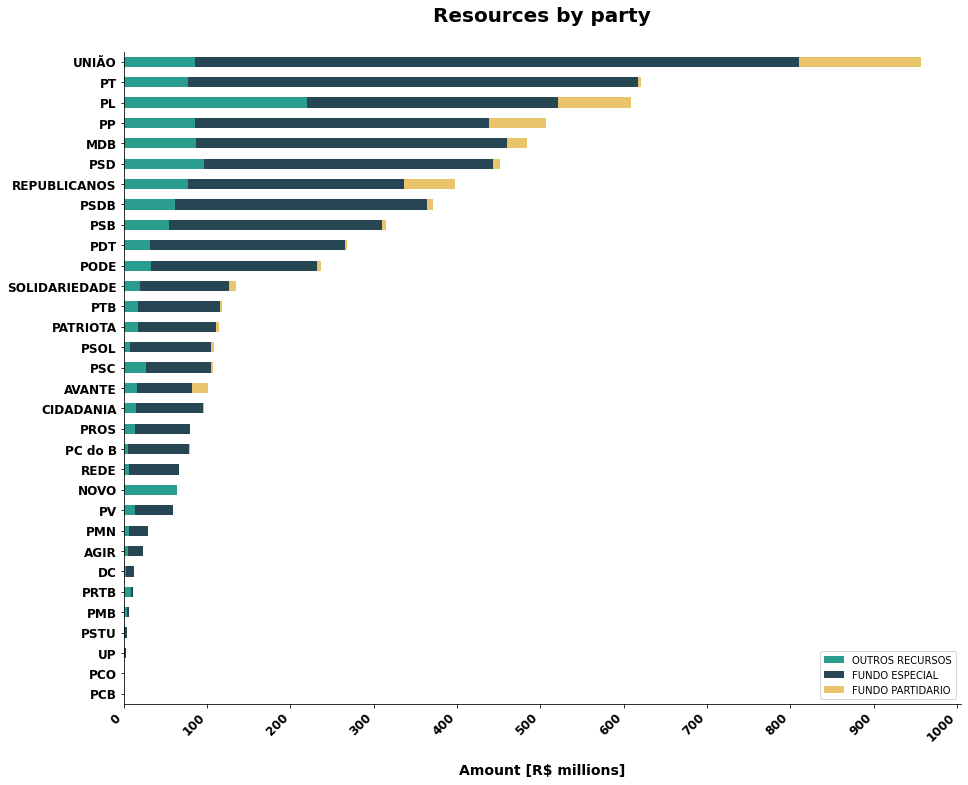

In [29]:
#plot
ax = parties_df[list(parties_df.columns)[:-1]].plot(kind='barh',
                                                    stacked=True,
                                                    color=['#2a9d8f', '#264653', '#e9c46a'],
                                                    figsize=[15, 12]
                                                   )
plt.title("Resources by party", fontsize = 20.0, fontweight = 'bold', pad=30)
plt.yticks(fontsize = 12.0, fontweight = 'bold')

plt.xlabel("Amount [R$ millions]", fontsize = 14.0, fontweight = 'bold')
plt.xticks(list(range(0,1100,100)), fontsize = 12.0, rotation=45, ha="right", fontweight = 'bold')

# adjust space between label and axis
ax.xaxis.labelpad = 20

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.legend(loc="lower right")
plt.show()

### Spent by Deputado Federal

In [30]:
# all types of cargos
cargos = income_df['DS_CARGO'].unique().tolist()

depfed_income_df = income_df.loc[income_df['DS_CARGO'] == 'Deputado Federal']

depfed_income_parties = depfed_income_df.groupby('SG_PARTIDO')['VR_RECEITA'].sum().sort_values(ascending=True)

In [31]:
# number of Deputados Federais elected by party
depfed_elected_party = electeds_df.groupby('SG_PARTIDO')['SG_PARTIDO'].count().sort_values(ascending=True)

In [32]:
# dataframe with total income per deputado federal and # electeds by party
depfed_income_elected_ratio_df = pd.DataFrame(index=parties, columns=['total_income_elected_ratio'])

for col in depfed_income_elected_ratio_df.columns:
    for idx in depfed_income_elected_ratio_df.index:
        
        if idx not in depfed_elected_party.index:
            
            depfed_income_elected_ratio_df.at[idx,col] = 0
            
        else:
            
            depfed_income_elected_ratio_df.at[idx,col] = (depfed_income_parties[idx]/1e3)/depfed_elected_party[idx]

depfed_income_elected_ratio_df.sort_values(by=['total_income_elected_ratio'], inplace=True)

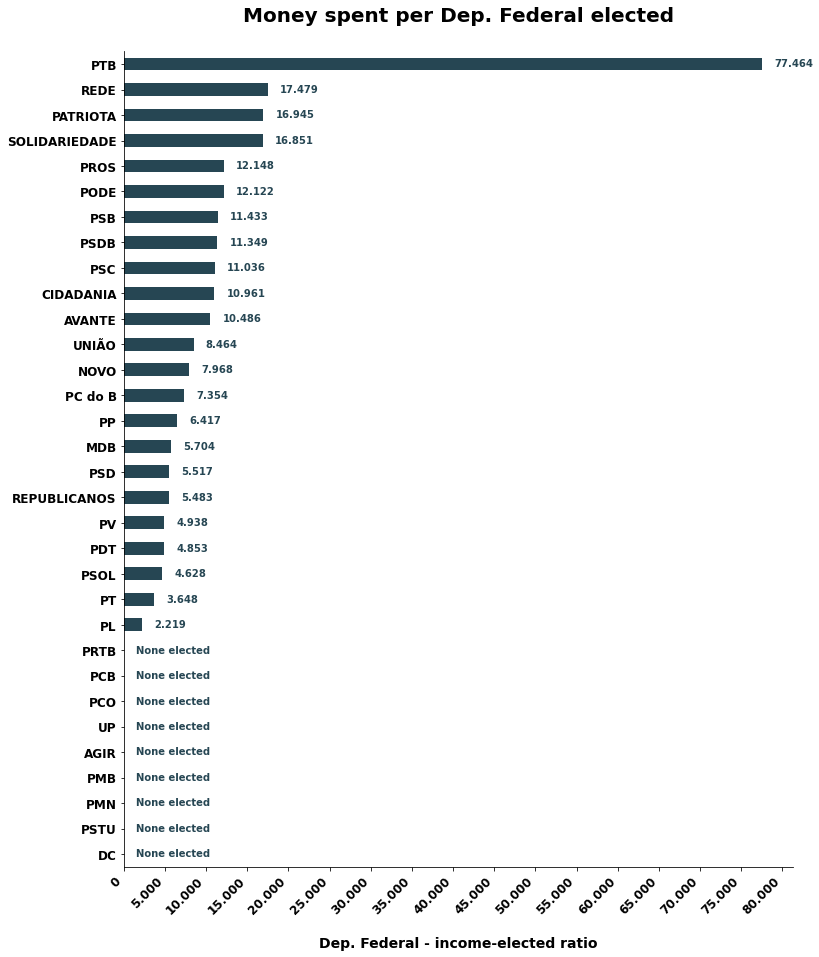

In [33]:
# plot
ax = depfed_income_elected_ratio_df[list(depfed_income_elected_ratio_df.columns)].plot(kind='barh',
                                                    stacked=True,
                                                    color=['#264653'],
                                                    figsize=[12, 15],
                                                    legend=None
                                                   )
plt.title("Money spent per Dep. Federal elected", fontsize = 20.0, fontweight = 'bold', pad=30)
plt.yticks(fontsize = 12.0, fontweight = 'bold')

xticks = list(range(0,85000,5000))
x = [format(number,',d') for number in xticks]
xf = [num.replace(',','.') for num in x]

plt.xlabel("Dep. Federal - income-elected ratio", fontsize = 14.0, fontweight = 'bold')
plt.xticks(ticks = xticks, labels = xf, fontsize = 12.0, rotation=45, ha="right", fontweight = 'bold')


# put labels values on top of bars
y = [int(round(i, 0)) for i in list(depfed_income_elected_ratio_df['total_income_elected_ratio'])]

yy = [format(number,',d') for number in y]
yf = [num.replace(',','.') for num in yy]

for i in range(9):
    yf[i] = 'None elected'
   
for i, v in enumerate(y):
    ax.text(v + 1500, i - 0.1, yf[i], color='#264653', fontweight='bold')

# adjust space between label and axis
ax.xaxis.labelpad = 20

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.show()

### Expense Origin

In [34]:
# all types of expenses
expense_origin_list = expense_df['DS_ORIGEM_DESPESA'].unique().tolist()

In [35]:
expense_origin_list[:10]

['Locação/cessão de bens imóveis',
 'Atividades de militância e mobilização de rua',
 'Despesas com pessoal',
 'Cessão ou locação de veículos',
 'Serviços prestados por terceiros',
 'Encargos financeiros, taxas bancárias e/ou op. cartão de crédito',
 'Alimentação',
 'Serviços advocatícios',
 'Produção de jingles, vinhetas e slogans',
 'Combustíveis e lubrificantes']

In [36]:
# expenses dataframe by type
expense_value_bytype = expense_df.groupby('DS_ORIGEM_DESPESA')['VR_DESPESA_CONTRATADA'].sum().sort_values(ascending=True)
pct = expense_value_bytype.values/expense_value_bytype.sum()
expense_origin_df = pd.DataFrame(index=list(expense_value_bytype.index))

expense_origin_df['VR_DESPESA_CONTRATADA'] = expense_value_bytype.values
expense_origin_df['PERCENTAGE'] = pct

rest_sum = expense_origin_df['VR_DESPESA_CONTRATADA'].sum() - expense_origin_df.iloc[-10:,0].sum()
rest_pct =  1.0 - expense_origin_df.iloc[-10:,1].sum()

lista = list(expense_origin_df.columns)
newrow_dict = {lista[0]: rest_sum, lista[1]: rest_pct}

df2 = pd.DataFrame(newrow_dict, index=['Restante somado'])

trunc_expense_origin_df = pd.concat([df2, expense_origin_df.iloc[-10:, :]])

In [37]:
trunc_expense_origin_df

,VR_DESPESA_CONTRATADA,PERCENTAGE
Restante somado,7.633225e+08,0.149433
Doações financeiras a outros candidatos/partidos,1.462056e+08,0.028622
Cessão ou locação de veículos,1.803459e+08,0.035306
Serviços advocatícios,1.991864e+08,0.038994
Despesa com Impulsionamento de Conteúdos,2.760379e+08,0.054039
Publicidade por adesivos,3.611537e+08,0.070702
"Produção de programas de rádio, televisão ou vídeo",3.926670e+08,0.076871
Despesas com pessoal,5.758398e+08,0.112730
Atividades de militância e mobilização de rua,5.835829e+08,0.114246
Serviços prestados por terceiros,6.227631e+08,0.121916


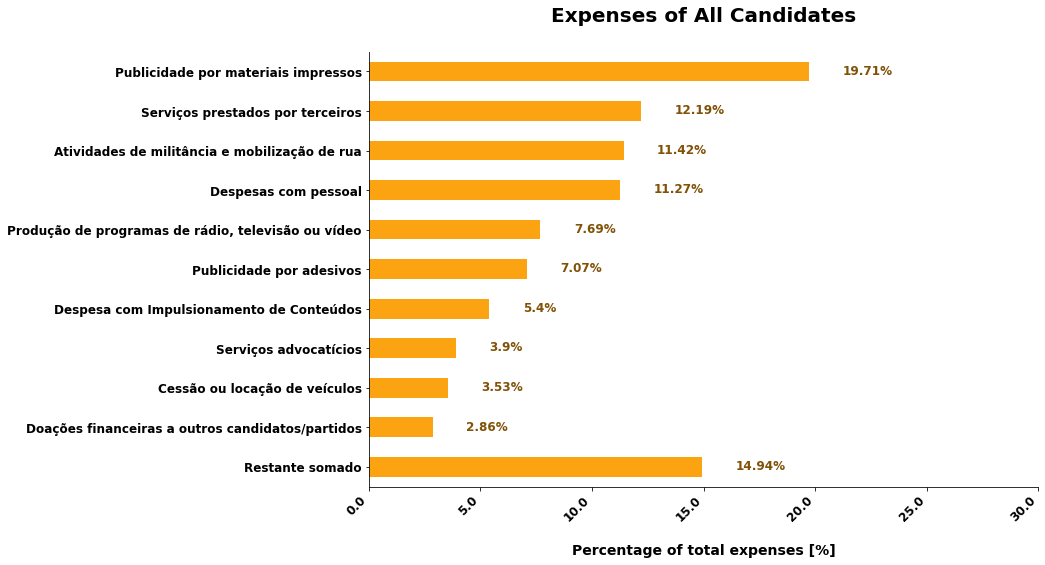

In [38]:
# plot
ax = trunc_expense_origin_df.iloc[:, 1].plot(kind='barh',
                                          color=['#FCA311'],
                                          figsize=[12, 8],
                                          legend=None
                                          )

plt.title("Expenses of All Candidates", fontsize = 20.0, fontweight = 'bold', pad=30)
plt.yticks(fontsize = 12.0, fontweight = 'bold')

xticks = np.linspace(0, 0.3, num=7).tolist()
xf = [str(round(i*100,1)) for i in xticks]

plt.xlabel("Percentage of total expenses [%]", fontsize = 14.0, fontweight = 'bold')
plt.xticks(ticks = xticks, labels = xf, fontsize = 12.0, rotation=45, ha="right", fontweight = 'bold')


# put labels values on top of bars
y = list(trunc_expense_origin_df.iloc[:, 1])
yf = [str(round(i*100, 2)) + "%" for i in y]
   
for i, v in enumerate(y):
    ax.text(v + 0.015, i - 0.07, yf[i], color='#805106', fontsize = 12.0, fontweight='bold')

    
# adjust space between label and axis
ax.xaxis.labelpad = 20

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.show()

### Link between Dep. Federal campaign income & electeds

In [39]:

deputado_income = depfed_income_df.groupby('SQ_CANDIDATO')['VR_RECEITA'].sum().sort_values(ascending=True).iloc[-513:]

top_513_income_list = list(deputado_income.index)
# top_513_income_list

In [40]:
deputados_elected_list = electeds_df['SQ_CANDIDATO'].tolist()
# deputados_elected_list

In [41]:
intersct = set(top_513_income_list).intersection(set(deputados_elected_list))
print("Number of Dep. Federal elected that are in the group of 513 higher campaign income: ", len(intersct))
print("As % of total Dep. Federal electeds: " + str(round(len(intersct)*100/len(deputados_elected_list),2)) + "%")

Number of Dep. Federal elected that are in the group of 513 higher campaign income:  271
As % of total Dep. Federal electeds: 52.83%


### Gender

In [42]:
# gender count %
gender_cand_df = (candidatos_df['DS_GENERO'].value_counts()/len(candidatos_df['DS_GENERO'])).sort_values(ascending=True)


In [43]:
# put skin colour on elected candidates dataframe
electeds_df['DS_GENERO'] = np.nan

for i in electeds_df.index:
    for ii in candidatos_df.index:
        
        if electeds_df.at[i, 'SQ_CANDIDATO'] == candidatos_df.at[ii, 'SQ_CANDIDATO']:
            
            electeds_df.at[i, 'DS_GENERO'] = candidatos_df.at[ii, 'DS_GENERO']

gender_elect_df = (electeds_df['DS_GENERO'].value_counts()/len(electeds_df['DS_GENERO'])).sort_values(ascending=True)


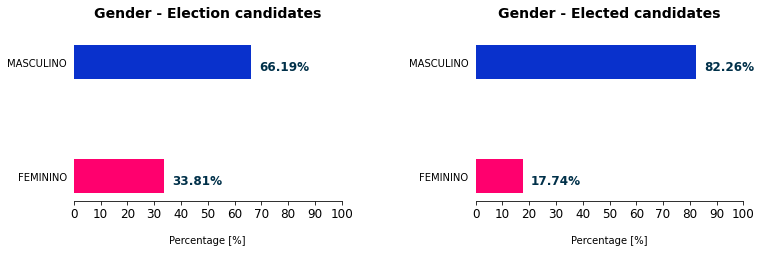

In [44]:
# Plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)

# Plot election candidates
axs[0].barh(gender_cand_df.index, gender_cand_df.values, height=0.3, color=['#FF006E','#0931CC'])
axs[0].set_title('Gender - Election candidates', fontsize = 14.0, fontweight = 'bold', pad=20)

# Plot elected candidates
axs[1].barh(gender_elect_df.index, gender_elect_df.values, height=0.3, color=['#FF006E','#0931CC'])
axs[1].set_title('Gender - Elected candidates', fontsize = 14.0, fontweight = 'bold', pad=20)


# set xticks
xticks = np.linspace(0, 1.0, num=11).tolist()
xf = [str(int(i*100)) for i in xticks]

# set text labels bars
y_cand = gender_cand_df.values.tolist()
yf_cand = [str(round(i*100, 2)) + "%" for i in y_cand]

y_elect = gender_elect_df.values.tolist()
yf_elect = [str(round(i*100, 2)) + "%" for i in y_elect]

for i, v in enumerate(y_cand):
    axs[0].text(v + 0.03, i - 0.07, yf_cand[i], color='#003049', fontsize = 12.0, fontweight='bold')

for i, v in enumerate(y_elect):
    axs[1].text(v + 0.03, i - 0.07, yf_elect[i], color='#003049', fontsize = 12.0, fontweight='bold')    
    
# apply xticks and spines
for ax in axs.flat:
    
    ax.set_xticks(ticks = xticks, labels = xf, fontsize = 12.0)
    ax.set(xlabel = 'Percentage [%]')
    
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.tick_params(left=False)

plt.show() 

### Skin colour


In [45]:
# gender count %
skin_cand_df = (candidatos_df['DS_COR_RACA'].value_counts()/len(candidatos_df['DS_COR_RACA'])).sort_values(ascending=True)


In [46]:
# put skin colour on elected candidates dataframe
electeds_df['DS_COR_RACA'] = np.nan

for i in electeds_df.index:
    for ii in candidatos_df.index:
        
        if electeds_df.at[i, 'SQ_CANDIDATO'] == candidatos_df.at[ii, 'SQ_CANDIDATO']:
            
            electeds_df.at[i, 'DS_COR_RACA'] = candidatos_df.at[ii, 'DS_COR_RACA']

skin_elect_df = (electeds_df['DS_COR_RACA'].value_counts()/len(electeds_df['DS_COR_RACA'])).sort_values(ascending=True)
            

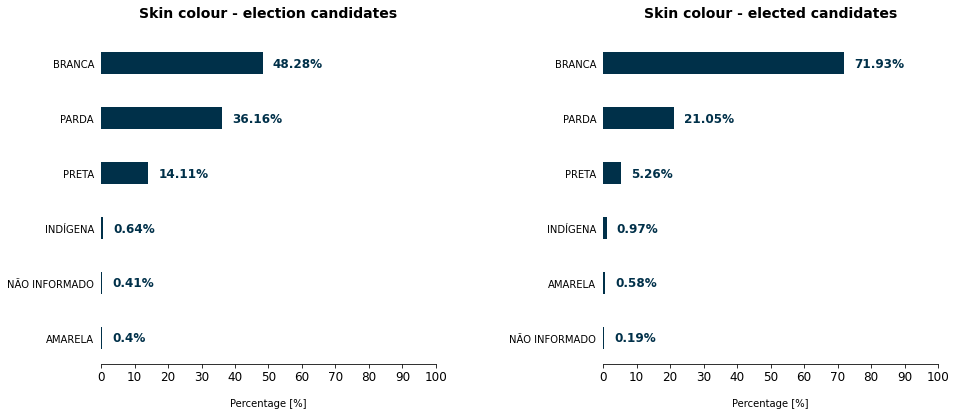

In [47]:
# Plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.5)

axs[0].barh(skin_cand_df.index, skin_cand_df.values, height=0.4, color=['#003049'])
axs[0].set_title('Skin colour - election candidates', fontsize = 14.0, fontweight = 'bold', pad=20)

axs[1].barh(skin_elect_df.index, skin_elect_df.values, height=0.4, color=['#003049'])
axs[1].set_title('Skin colour - elected candidates', fontsize = 14.0, fontweight = 'bold', pad=20)

# set xticks
xticks = np.linspace(0, 1.0, num=11).tolist()
xf = [str(int(i*100)) for i in xticks]

# set text labels bars
y_cand = skin_cand_df.values.tolist()
yf_cand = [str(round(i*100, 2)) + "%" for i in y_cand]

y_elect = skin_elect_df.values.tolist()
yf_elect = [str(round(i*100, 2)) + "%" for i in y_elect]

for i, v in enumerate(y_cand):
    axs[0].text(v + 0.03, i - 0.07, yf_cand[i], color='#003049', fontsize = 12.0, fontweight='bold')

for i, v in enumerate(y_elect):
    axs[1].text(v + 0.03, i - 0.07, yf_elect[i], color='#003049', fontsize = 12.0, fontweight='bold')    
    
# apply xticks and spines
for ax in axs.flat:
    
    ax.set_xticks(ticks = xticks, labels = xf, fontsize = 12.0)
    ax.set(xlabel = 'Percentage [%]')
    
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.tick_params(left=False)

plt.show() 

### Age

In [48]:
length_cand = len(candidatos_df['NR_IDADE_DATA_POSSE'].value_counts())

electeds_df['NR_IDADE_DATA_POSSE'] = np.nan

for i in electeds_df.index:
    for ii in candidatos_df.index:
        
        if electeds_df.at[i, 'SQ_CANDIDATO'] == candidatos_df.at[ii, 'SQ_CANDIDATO']:
            
            electeds_df.at[i, 'NR_IDADE_DATA_POSSE'] = candidatos_df.at[ii, 'NR_IDADE_DATA_POSSE']

electeds_df['NR_IDADE_DATA_POSSE'] = electeds_df['NR_IDADE_DATA_POSSE'].astype(np.int32)

length_elect = len(electeds_df['NR_IDADE_DATA_POSSE'].value_counts())


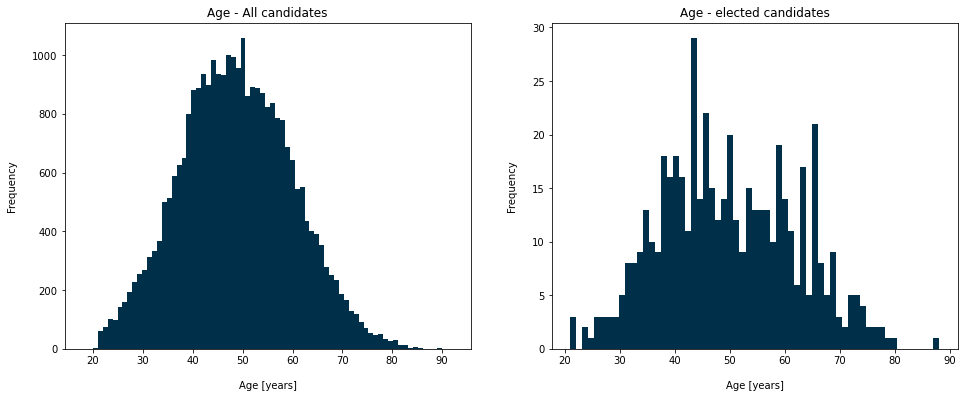

In [49]:
# Plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axs[0].hist(candidatos_df['NR_IDADE_DATA_POSSE'], bins=length_cand + 1, alpha=1.0, color=['#003049'])
axs[0].set_title('Age - All candidates')

axs[1].hist(electeds_df['NR_IDADE_DATA_POSSE'], bins=length_elect + 1, alpha=1.0, color=['#003049'])
axs[1].set_title('Age - elected candidates')

for ax in axs.flat:
    ax.set(xlabel = 'Age [years]', ylabel = 'Frequency')
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15

plt.show() 

In [50]:
len(candidatos_df.loc[candidatos_df['DS_CARGO'] == "DEPUTADO FEDERAL"]['SQ_CANDIDATO'].unique().tolist())

10624

In [51]:
len(income_df.loc[income_df['DS_CARGO'] == "Deputado Federal"]['SQ_CANDIDATO'].unique().tolist())

9025